In [1]:
#Azure Data Analytics for Insurance claim fraud
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [2]:
#Reading input file from csv.
InPatient_Data = pd.read_csv("C:\\polu\\Upskill\\CaseStudies\\HealthCare\\Insurance_Claim_Data\\Train_Inpatientdata-1542865627584.csv")
InPatient_Data.shape

(40474, 30)

In [3]:
#Dropping columns which are missing/NA more than 75%
InPatient_Data=InPatient_Data.drop(['OtherPhysician','ClmProcedureCode_6','ClmDiagnosisCode_10','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4','ClmProcedureCode_5'], axis=1)
InPatient_Data.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'AdmissionDt', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid',
       'DischargeDt', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmProcedureCode_1'],
      dtype='object')

In [4]:
#Converting datetime to datetime format
InPatient_Data['ClaimStartDt'] = pd.to_datetime(InPatient_Data['ClaimStartDt'])
InPatient_Data['ClaimEndDt'] = pd.to_datetime(InPatient_Data['ClaimEndDt'])

In [5]:
#ClaimDays feature creation
InPatient_Data['ClaimDays'] = InPatient_Data['ClaimEndDt'] - InPatient_Data['ClaimStartDt']
InPatient_Data['ClaimDays'] = InPatient_Data['ClaimDays']  / np.timedelta64(1,'D')
InPatient_Data['ClaimDays'] =  InPatient_Data['ClaimDays'].astype(int) #Converting to int type
InPatient_Data.head(5)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,AdmissionDt,ClmAdmitDiagnosisCode,...,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmProcedureCode_1,ClaimDays
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,2009-04-12,7866,...,4019,5853,7843,2768,71590,2724,19889,5849,NaN,6
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,2009-08-31,6186,...,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,2
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,2009-09-17,29590,...,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,3
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,2009-02-14,431,...,2762,7843,32723,V1041,4254,25062,40390,4019,331.0,8
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,2009-08-13,78321,...,3051,34400,5856,42732,486,5119,29620,20300,3893.0,17


In [6]:
#Filling missing values for Physician column
InPatient_Data['AttendingPhysician']=InPatient_Data['AttendingPhysician'].fillna(InPatient_Data['OperatingPhysician'])
InPatient_Data['OperatingPhysician']=InPatient_Data['OperatingPhysician'].fillna(InPatient_Data['AttendingPhysician'])
#InPatient_Data[InPatient_Data['AttendingPhysician'].isnull()]
#InPatient_Data[['Provider','AttendingPhysician','OperatingPhysician']]
InPatient_Data['AttendingPhysician'] = InPatient_Data['AttendingPhysician'].fillna(method='ffill')
InPatient_Data['OperatingPhysician'] = InPatient_Data['OperatingPhysician'].fillna(method='ffill')
InPatient_Data['DeductibleAmtPaid']=InPatient_Data['DeductibleAmtPaid'].fillna(InPatient_Data['DeductibleAmtPaid'].mean())

In [7]:
#Filling missing values for ClaimDiagnosis codes.
InPatient_Data['ClmDiagnosisCode_2'] = InPatient_Data['ClmDiagnosisCode_2'].fillna(method='ffill')
InPatient_Data['ClmDiagnosisCode_3'] = InPatient_Data['ClmDiagnosisCode_3'].fillna(method='ffill')
InPatient_Data['ClmDiagnosisCode_4'] = InPatient_Data['ClmDiagnosisCode_4'].fillna(method='ffill')
InPatient_Data['ClmDiagnosisCode_5'] = InPatient_Data['ClmDiagnosisCode_5'].fillna(method='ffill')
InPatient_Data['ClmDiagnosisCode_6'] = InPatient_Data['ClmDiagnosisCode_6'].fillna(method='ffill')
InPatient_Data['ClmDiagnosisCode_7'] = InPatient_Data['ClmDiagnosisCode_7'].fillna(method='ffill')
InPatient_Data['ClmDiagnosisCode_8'] = InPatient_Data['ClmDiagnosisCode_8'].fillna(method='ffill')
InPatient_Data['ClmDiagnosisCode_9'] = InPatient_Data['ClmDiagnosisCode_9'].fillna(method='ffill')
InPatient_Data['ClmProcedureCode_1'] = InPatient_Data['ClmProcedureCode_1'].fillna(method='bfill')
#InPatient_Data['ClmProcedureCode_1'] = InPatient_Data['ClmProcedureCode_1'].fillna(InPatient_Data['ClmProcedureCode_1'].mean())

#Removing DeductibleAmtPaid column since its constant.
InPatient_Data=InPatient_Data.drop(['DeductibleAmtPaid'], axis=1)
#InPatient_Data['ClmDiagnosisCode_2'].isnull().sum()
#len(InPatient_Data[InPatient_Data['DeductibleAmtPaid'].isnull()])
InPatient_Data.shape

(40474, 23)

In [8]:
#Reading Fraud providers labelled data
# '1' - Fraud transaction, '0' - Non-Fraud transaction
#len(Fraud_Data['Provider'].unique())
#len(InPatient_Data['Provider'].unique())
Fraud_Data = pd.read_csv("C:\\polu\\Upskill\\CaseStudies\\HealthCare\\Insurance_Claim_Data\\Train-Fraud.csv")
Fraud_Data.shape, InPatient_Data.shape
Fraud_Data = Fraud_Data[Fraud_Data['PotentialFraud'] == 1]

In [9]:
#Merging two dataframes to prepare lablled data.
Merge_Df = InPatient_Data.merge(Fraud_Data, how ='left', left_on='Provider', right_on='Provider')

Merge_Df['PotentialFraud'] = Merge_Df['PotentialFraud'].fillna(0)
Merge_Df['PotentialFraud'] =  Merge_Df['PotentialFraud'].astype(int)
Merge_Df.shape

(40474, 24)

In [10]:
#Merge_Df.loc[(Merge_Df['ClmProcedureCode_1']==9904.0) & (Merge_Df['PotentialFraud']==0)]
Merge_Df.loc[(Merge_Df['Provider']=='PRV52019') & (Merge_Df['PotentialFraud']==1)]

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,AdmissionDt,ClmAdmitDiagnosisCode,...,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmProcedureCode_1,ClaimDays,PotentialFraud
46,BENE11153,CLM44063,2009-03-25,2009-03-27,PRV52019,3000,PHY351641,PHY351641,2009-03-25,73313,...,71945,25000,71690,3051,71535,2449,V4581,3491.0,2,1
177,BENE11670,CLM37086,2009-02-05,2009-02-08,PRV52019,400,PHY416959,PHY416959,2009-02-05,6084,...,41401,56210,32723,V854,42731,4148,4142,8154.0,3,1
270,BENE11998,CLM62318,2009-08-03,2009-08-07,PRV52019,6000,PHY355567,PHY355567,2009-08-03,57512,...,V4582,V1251,40390,78791,33372,V441,0416,5101.0,4,1
437,BENE12624,CLM50035,2009-05-06,2009-05-10,PRV52019,7000,PHY395933,PHY395933,2009-05-06,5990,...,34831,34830,53085,5589,5939,486,70703,8180.0,4,1
452,BENE12699,CLM57568,2009-06-29,2009-06-30,PRV52019,5000,PHY401599,PHY401599,2009-06-29,4019,...,56400,7802,2769,7840,27651,0417,4829,3929.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40163,BENE158096,CLM56081,2009-06-17,2009-06-27,PRV52019,6000,PHY412022,PHY354694,2009-06-17,42731,...,25000,9221,4168,7823,0414,59970,4019,8843.0,10,1
40185,BENE158173,CLM79948,2009-12-17,2009-12-21,PRV52019,7000,PHY384309,PHY384309,2009-12-17,78900,...,49122,60091,40390,5990,7837,5854,28529,8703.0,4,1
40200,BENE158221,CLM62646,2009-08-05,2009-08-08,PRV52019,2000,PHY414382,PHY406681,2009-08-05,42731,...,33394,71590,28861,2270,78079,V1046,496,8872.0,3,1
40305,BENE158590,CLM52889,2009-05-26,2009-05-27,PRV52019,5000,PHY393952,PHY393952,2009-05-26,2410,...,7856,V1302,61172,2749,43811,412,4019,64.0,1,1


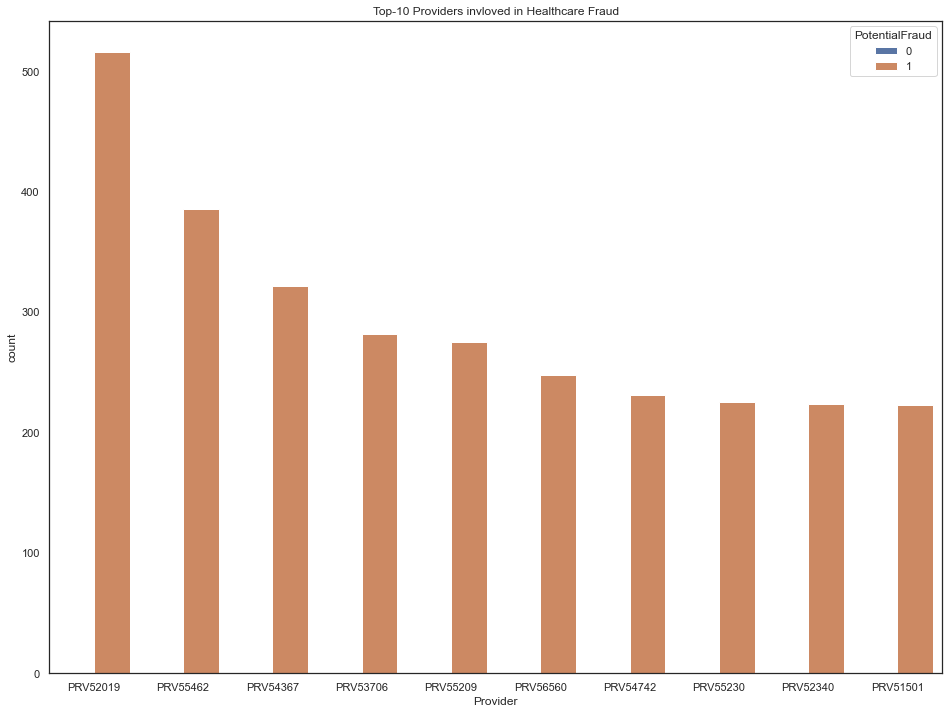

<Figure size 1152x864 with 0 Axes>

In [11]:
#Provider based fraud data.
sns.set(rc={'figure.figsize':(16,12)},style='white')

ax=sns.countplot(x='Provider',hue='PotentialFraud',data=Merge_Df,order=Merge_Df.Provider.value_counts().iloc[:10].index)

plt.title('Top-10 Providers invloved in Healthcare Fraud')
    
plt.show()

plt.savefig('TopProvidersinvlovedinHealthcareFraud')

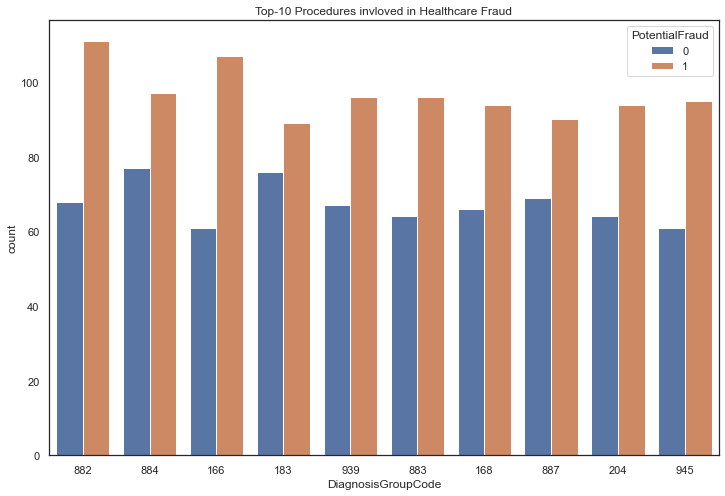

<Figure size 864x576 with 0 Axes>

In [12]:
#DiagnosisGroupCode based fraud data.
sns.set(rc={'figure.figsize':(12,8)},style='white')

ax=sns.countplot(x='DiagnosisGroupCode',hue='PotentialFraud',data=Merge_Df,order=Merge_Df.DiagnosisGroupCode.value_counts().iloc[:10].index)

plt.title('Top-10 Procedures invloved in Healthcare Fraud')
    
plt.show()

plt.savefig('TopProceduresinvlovedinHealthcareFraud')

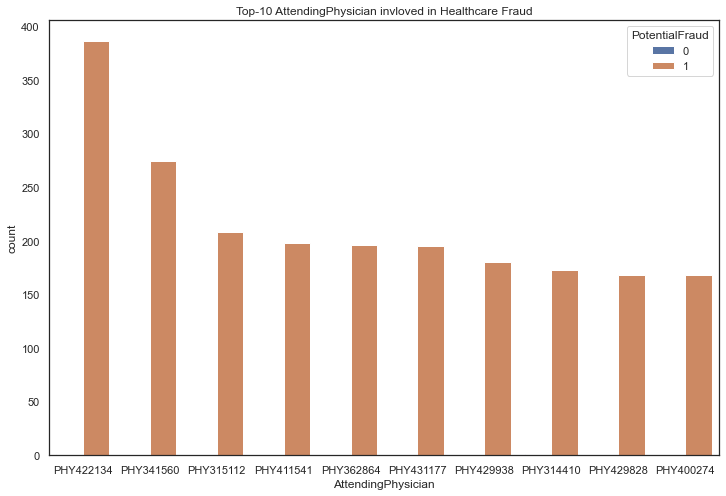

<Figure size 864x576 with 0 Axes>

In [13]:
#AttendingPhysician wised based fraud data.
sns.set(rc={'figure.figsize':(12,8)},style='white')

ax=sns.countplot(x='AttendingPhysician',hue='PotentialFraud',data=Merge_Df,order=Merge_Df.AttendingPhysician.value_counts().iloc[:10].index)

plt.title('Top-10 AttendingPhysician invloved in Healthcare Fraud')
    
plt.show()

plt.savefig('Top AttendingPhysicians invlovedinHealthcareFraud')

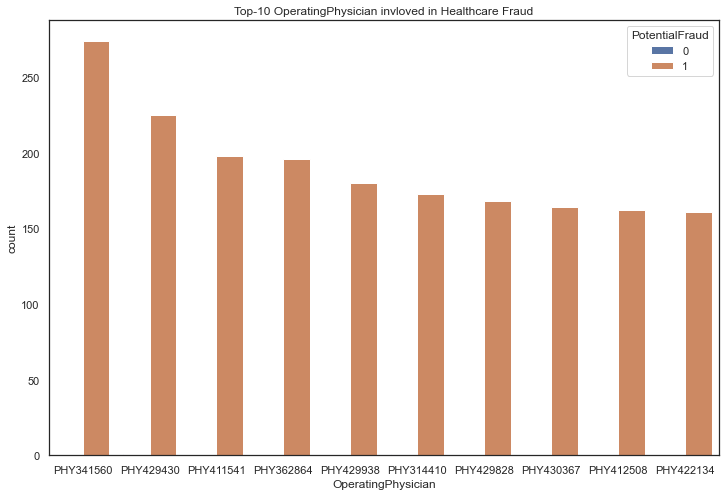

<Figure size 864x576 with 0 Axes>

In [14]:
#OperatingPhysician wised based fraud data.
sns.set(rc={'figure.figsize':(12,8)},style='white')

ax=sns.countplot(x='OperatingPhysician',hue='PotentialFraud',data=Merge_Df,order=Merge_Df.OperatingPhysician.value_counts().iloc[:10].index)

plt.title('Top-10 OperatingPhysician invloved in Healthcare Fraud')
    
plt.show()

plt.savefig('Top OperatingPhysician invlovedinHealthcareFraud')

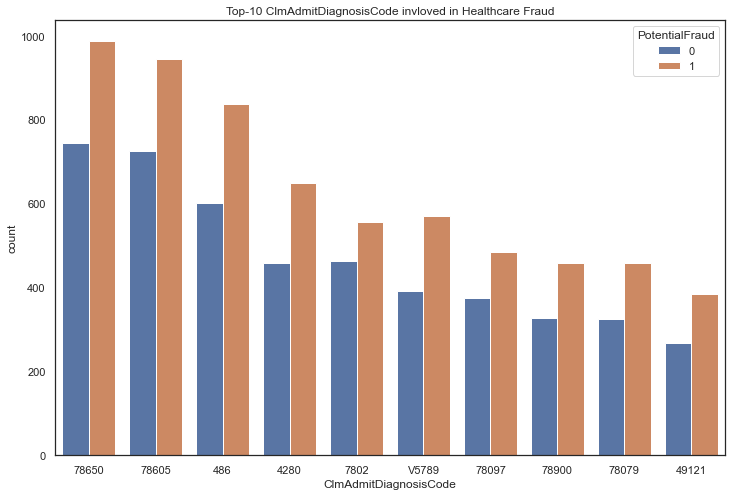

<Figure size 864x576 with 0 Axes>

In [15]:
#ClmAdmitDiagnosisCode wised based fraud data.
sns.set(rc={'figure.figsize':(12,8)},style='white')

ax=sns.countplot(x='ClmAdmitDiagnosisCode',hue='PotentialFraud',data=Merge_Df,order=Merge_Df.ClmAdmitDiagnosisCode.value_counts().iloc[:10].index)

plt.title('Top-10 ClmAdmitDiagnosisCode invloved in Healthcare Fraud')
    
plt.show()

plt.savefig('Top ClmAdmitDiagnosisCode invlovedinHealthcareFraud')

In [16]:
#Feature creation.
Merge_Df['AttendPhysician_ClaimAmtReimbsd'] = Merge_Df.groupby('AttendingPhysician')['InscClaimAmtReimbursed'].transform('mean')
Merge_Df['OperatingPhysician_ClaimAmtReimbsd'] = Merge_Df.groupby('OperatingPhysician')['InscClaimAmtReimbursed'].transform('mean')
Merge_Df['Provider_ClaimAmtReimbsd'] = Merge_Df.groupby('Provider')['InscClaimAmtReimbursed'].transform('mean')
Merge_Df ['DiagnosisGroup_ClaimAmtReimbsd'] = Merge_Df.groupby('DiagnosisGroupCode')['InscClaimAmtReimbursed'].transform('mean')
Merge_Df ['ClmDiagnosisCode_1_ClaimAmtReimbsd'] = Merge_Df.groupby('ClmDiagnosisCode_1')['InscClaimAmtReimbursed'].transform('mean')
Merge_Df ['ClmDiagnosisCode_2_ClaimAmtReimbsd'] = Merge_Df.groupby('ClmDiagnosisCode_2')['InscClaimAmtReimbursed'].transform('mean')
Merge_Df ['ClmProcedureCode_1_ClaimAmtReimbsd'] = Merge_Df.groupby('ClmProcedureCode_1')['InscClaimAmtReimbursed'].transform('mean')
Merge_Df ['ClmDiagnosisCode_3_ClaimAmtReimbsd'] = Merge_Df.groupby('ClmDiagnosisCode_3')['InscClaimAmtReimbursed'].transform('mean')
Merge_Df ['ClmDiagnosisCode_4_ClaimAmtReimbsd'] = Merge_Df.groupby('ClmDiagnosisCode_4')['InscClaimAmtReimbursed'].transform('mean')
Merge_Df ['ClmDiagnosisCode_5_ClaimAmtReimbsd'] = Merge_Df.groupby('ClmDiagnosisCode_5')['InscClaimAmtReimbursed'].transform('mean')
Merge_Df ['ClmDiagnosisCode_6_ClaimAmtReimbsd'] = Merge_Df.groupby('ClmDiagnosisCode_6')['InscClaimAmtReimbursed'].transform('mean')
Merge_Df ['ClmDiagnosisCode_7_ClaimAmtReimbsd'] = Merge_Df.groupby('ClmDiagnosisCode_7')['InscClaimAmtReimbursed'].transform('mean')
Merge_Df ['ClmDiagnosisCode_8_ClaimAmtReimbsd'] = Merge_Df.groupby('ClmDiagnosisCode_8')['InscClaimAmtReimbursed'].transform('mean')
Merge_Df ['ClmDiagnosisCode_9_ClaimAmtReimbsd'] = Merge_Df.groupby('ClmDiagnosisCode_9')['InscClaimAmtReimbursed'].transform('mean')
Merge_Df ['BeneID_ClaimAmtReimbsd'] = Merge_Df.groupby('BeneID')['InscClaimAmtReimbursed'].transform('mean')

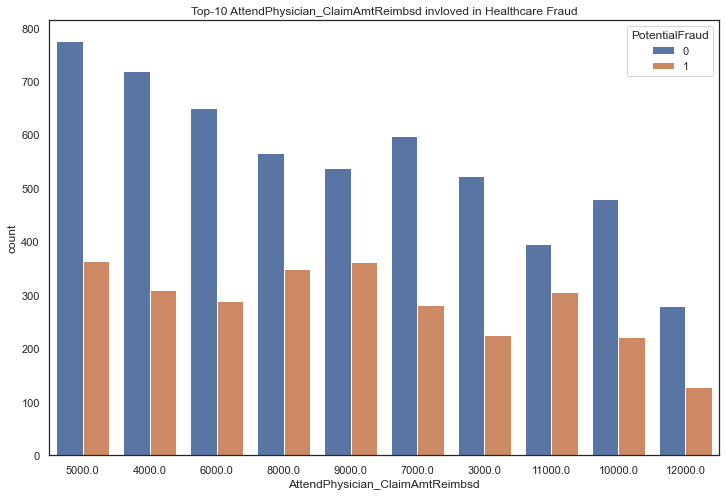

<Figure size 864x576 with 0 Axes>

In [17]:
#AttendPhysician_ClaimAmtReimbsd wised based fraud data.
sns.set(rc={'figure.figsize':(12,8)},style='white')

ax=sns.countplot(x='AttendPhysician_ClaimAmtReimbsd',hue='PotentialFraud',data=Merge_Df,order=Merge_Df.AttendPhysician_ClaimAmtReimbsd.value_counts().iloc[:10].index)

plt.title('Top-10 AttendPhysician_ClaimAmtReimbsd invloved in Healthcare Fraud')
    
plt.show()

plt.savefig('Top AttendPhysician_ClaimAmtReimbsd invlovedinHealthcareFraud')

In [18]:
Merge_Df.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'AdmissionDt', 'ClmAdmitDiagnosisCode', 'DischargeDt',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmProcedureCode_1', 'ClaimDays',
       'PotentialFraud', 'AttendPhysician_ClaimAmtReimbsd',
       'OperatingPhysician_ClaimAmtReimbsd', 'Provider_ClaimAmtReimbsd',
       'DiagnosisGroup_ClaimAmtReimbsd', 'ClmDiagnosisCode_1_ClaimAmtReimbsd',
       'ClmDiagnosisCode_2_ClaimAmtReimbsd',
       'ClmProcedureCode_1_ClaimAmtReimbsd',
       'ClmDiagnosisCode_3_ClaimAmtReimbsd',
       'ClmDiagnosisCode_4_ClaimAmtReimbsd',
       'ClmDiagnosisCode_5_ClaimAmtReimbsd',
       'ClmDiagnosisCode_6_ClaimAmtReimbsd',
       'ClmDiagnosisCode_7

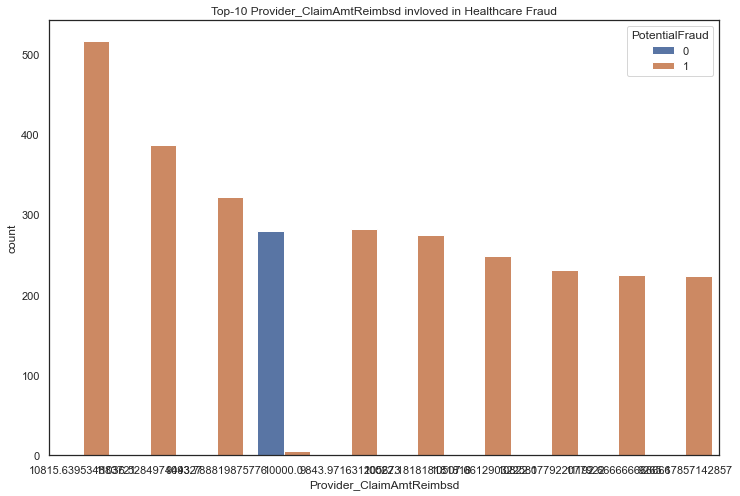

<Figure size 864x576 with 0 Axes>

In [19]:
#Provider_ClaimAmtReimbsd wised based fraud data.
sns.set(rc={'figure.figsize':(12,8)},style='white')

ax=sns.countplot(x='Provider_ClaimAmtReimbsd',hue='PotentialFraud',data=Merge_Df,order=Merge_Df.Provider_ClaimAmtReimbsd.value_counts().iloc[:10].index)

plt.title('Top-10 Provider_ClaimAmtReimbsd invloved in Healthcare Fraud')
    
plt.show()

plt.savefig('Top Provider_ClaimAmtReimbsd invlovedinHealthcareFraud')

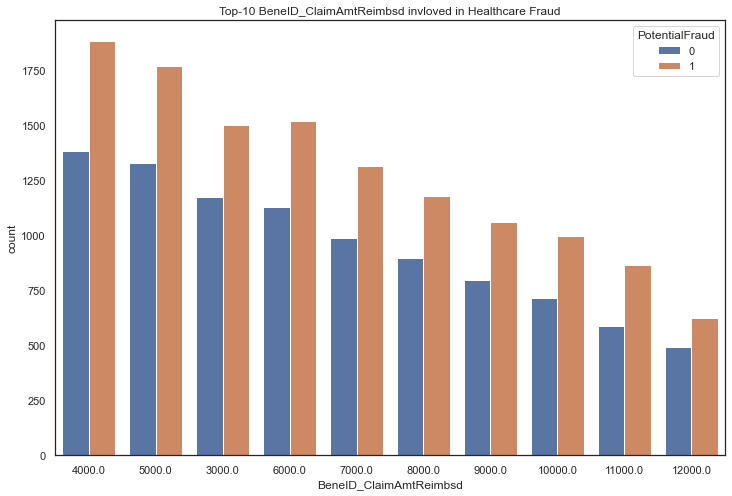

<Figure size 864x576 with 0 Axes>

In [20]:
#BeneID_ClaimAmtReimbsd wised based fraud data.
sns.set(rc={'figure.figsize':(12,8)},style='white')

ax=sns.countplot(x='BeneID_ClaimAmtReimbsd',hue='PotentialFraud',data=Merge_Df,order=Merge_Df.BeneID_ClaimAmtReimbsd.value_counts().iloc[:10].index)

plt.title('Top-10 BeneID_ClaimAmtReimbsd invloved in Healthcare Fraud')
    
plt.show()

plt.savefig('Top BeneID_ClaimAmtReimbsd invlovedinHealthcareFraud')

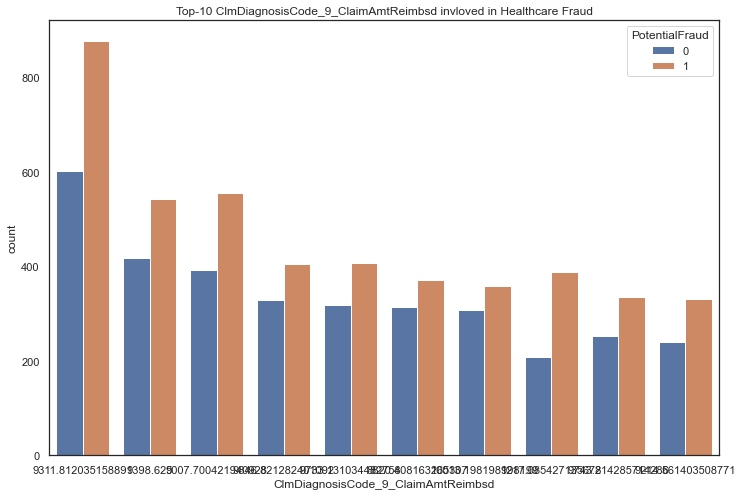

<Figure size 864x576 with 0 Axes>

In [21]:
#ClmDiagnosisCode_9_ClaimAmtReimbsd wised based fraud data.
sns.set(rc={'figure.figsize':(12,8)},style='white')

ax=sns.countplot(x='ClmDiagnosisCode_9_ClaimAmtReimbsd',hue='PotentialFraud',data=Merge_Df,order=Merge_Df.ClmDiagnosisCode_9_ClaimAmtReimbsd.value_counts().iloc[:10].index)

plt.title('Top-10 ClmDiagnosisCode_9_ClaimAmtReimbsd invloved in Healthcare Fraud')
    
plt.show()

plt.savefig('Top ClmDiagnosisCode_9_ClaimAmtReimbsd invlovedinHealthcareFraud')

In [22]:
#Creating Provider_Df dataframe
Provider_Df = Merge_Df[['Provider','PotentialFraud','ClmDiagnosisCode_2_ClaimAmtReimbsd','ClmProcedureCode_1_ClaimAmtReimbsd','ClmDiagnosisCode_3_ClaimAmtReimbsd','ClmDiagnosisCode_4_ClaimAmtReimbsd','ClmDiagnosisCode_5_ClaimAmtReimbsd','ClmDiagnosisCode_6_ClaimAmtReimbsd','ClmDiagnosisCode_7_ClaimAmtReimbsd','ClmDiagnosisCode_8_ClaimAmtReimbsd','ClmDiagnosisCode_9_ClaimAmtReimbsd', 'BeneID_ClaimAmtReimbsd']]

In [23]:
X = Provider_Df.drop(axis = 1, columns=['Provider','PotentialFraud'])
y = Provider_Df['PotentialFraud']
X.shape, Provider_Df.shape

((40474, 10), (40474, 12))

In [24]:
X = Merge_Df[['AttendPhysician_ClaimAmtReimbsd','OperatingPhysician_ClaimAmtReimbsd', 'Provider_ClaimAmtReimbsd','DiagnosisGroup_ClaimAmtReimbsd', 'ClmDiagnosisCode_1_ClaimAmtReimbsd',
'ClmDiagnosisCode_2_ClaimAmtReimbsd','ClmProcedureCode_1_ClaimAmtReimbsd','ClmDiagnosisCode_3_ClaimAmtReimbsd','ClmDiagnosisCode_4_ClaimAmtReimbsd','ClmDiagnosisCode_5_ClaimAmtReimbsd',
'ClmDiagnosisCode_6_ClaimAmtReimbsd','ClmDiagnosisCode_7_ClaimAmtReimbsd','ClmDiagnosisCode_8_ClaimAmtReimbsd','ClmDiagnosisCode_9_ClaimAmtReimbsd', 'BeneID_ClaimAmtReimbsd']]
y = Merge_Df['PotentialFraud']

X.shape, y.shape

((40474, 15), (40474,))

In [25]:
#len(Provider_Df[Provider_Df['PotentialFraud']==1]), len(Provider_Df[Provider_Df['PotentialFraud']==0])
from collections import Counter
Counter(y)

Counter({1: 23402, 0: 17072})

In [26]:
#Balancing the imbalanced dataset using SMOTE technique.
import imblearn
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
Counter(y)

Counter({1: 23402, 0: 23402})

In [27]:
Merge_Df.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'AdmissionDt', 'ClmAdmitDiagnosisCode', 'DischargeDt',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmProcedureCode_1', 'ClaimDays',
       'PotentialFraud', 'AttendPhysician_ClaimAmtReimbsd',
       'OperatingPhysician_ClaimAmtReimbsd', 'Provider_ClaimAmtReimbsd',
       'DiagnosisGroup_ClaimAmtReimbsd', 'ClmDiagnosisCode_1_ClaimAmtReimbsd',
       'ClmDiagnosisCode_2_ClaimAmtReimbsd',
       'ClmProcedureCode_1_ClaimAmtReimbsd',
       'ClmDiagnosisCode_3_ClaimAmtReimbsd',
       'ClmDiagnosisCode_4_ClaimAmtReimbsd',
       'ClmDiagnosisCode_5_ClaimAmtReimbsd',
       'ClmDiagnosisCode_6_ClaimAmtReimbsd',
       'ClmDiagnosisCode_7

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
#log = LogisticRegressionCV(cv=10,class_weight='balanced',random_state=123)
#Standardization of the give data
sc = StandardScaler() #MixMaxScaler
sc.fit(X)
X_std = sc.transform(X)

In [29]:
## 'stratify=y' will make sure equal distribution of yes:no in both train and validation
X_train,X_val,y_train,y_val = train_test_split(X_std,y,test_size=0.3,random_state=101,stratify=y,shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((32762, 15), (14042, 15), (32762,), (14042,))

In [30]:
from sklearn.linear_model import LogisticRegressionCV

log = LogisticRegressionCV(cv=10,class_weight='balanced',random_state=123)    
# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies
#in the input data as ``n_samples / (n_classes * np.bincount(y))``.

log.fit(X_train,y_train)

LogisticRegressionCV(class_weight='balanced', cv=10, random_state=123)

In [31]:
#Logistic Regression Model Prediction for Train and Validation
#log_train_pred_probability=log.predict_proba(X_train)
log_train_pred_probability=log.predict_proba(X_train)
log_val_pred_probability=log.predict_proba(X_val)

C:\Users\SanjeevaPolu\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SanjeevaPolu\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


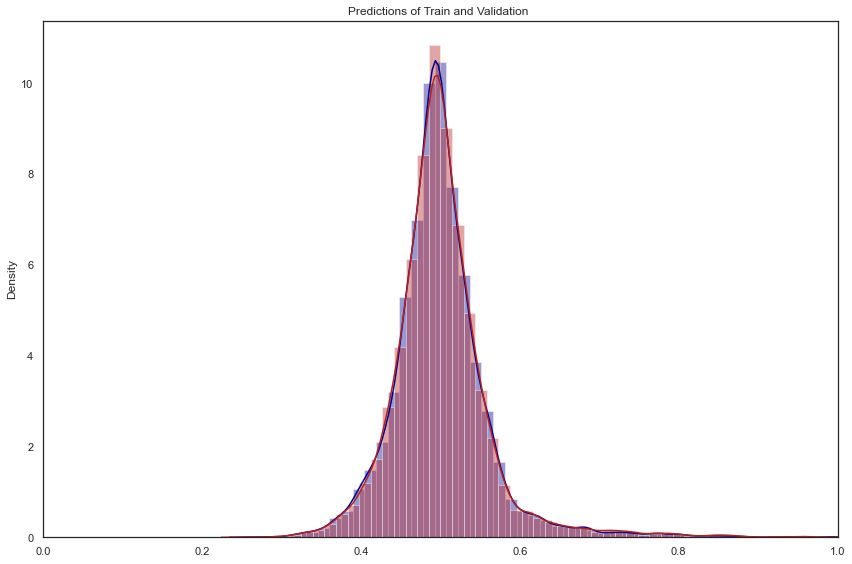

In [32]:
# Lets compare model prediction performance on train and Validation both.

fig = plt.figure(figsize=(12,8))

sns.distplot(log.predict_proba(X_train)[:,1],color='darkblue')
sns.distplot(log.predict_proba(X_val)[:,1],color='firebrick')
plt.title('Predictions of Train and Validation ')
plt.xlim([0, 1])

plt.tight_layout()

plt.show()

In [33]:
## Lets Set probability Threshold to 0.60
log_train_pred_60=(log.predict_proba(X_train)[:,1]>0.60).astype(bool)
log_val_pred_60=(log.predict_proba(X_val)[:,1]>0.60).astype(bool)

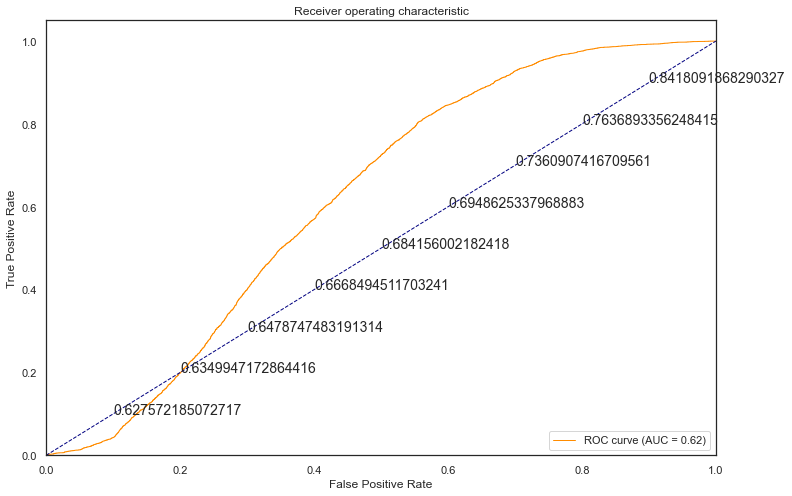

In [34]:
from sklearn.metrics import roc_curve, auc,precision_recall_curve
fpr, tpr, thresholds = roc_curve(y_val,log.predict_proba(X_val)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')

for label in range(1,10,1):
    plt.text((10-label)/10,(10-label)/10,thresholds[label*15],fontdict={'size': 14})

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [35]:
#Confusion matrix, Accuracy, sensitivity and specificity

from sklearn.metrics import confusion_matrix,accuracy_score,cohen_kappa_score,roc_auc_score,f1_score,auc

cm0 = confusion_matrix(y_train, log_train_pred_60,labels=[1,0])
print('Confusion Matrix Train : \n', cm0)

cm1 = confusion_matrix(y_val, log_val_pred_60,labels=[1,0])
print('Confusion Matrix Val: \n', cm1)

total0=sum(sum(cm0))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy0=(cm0[0,0]+cm0[1,1])/total0
print ('Accuracy Train: ', accuracy0)

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy Val: ', accuracy1)

sensitivity0 = cm0[0,0]/(cm0[0,0]+cm0[0,1])
print('Sensitivity Train : ', sensitivity0 )

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity Val: ', sensitivity1 )

specificity0 = cm0[1,1]/(cm0[1,0]+cm0[1,1])
print('Specificity Train: ', specificity0)

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity Val: ', specificity1)

KappaValue=cohen_kappa_score(y_val, log_val_pred_60)
print("Kappa Value :",KappaValue)
AUC=roc_auc_score(y_val, log_val_pred_60)

print("AUC         :",AUC)

print("F1-Score Train  : ",f1_score(y_train, log_train_pred_60))

print("F1-Score Val  : ",f1_score(y_val, log_val_pred_60))

Confusion Matrix Train : 
 [[  428 15953]
 [ 1020 15361]]
Confusion Matrix Val: 
 [[ 174 6847]
 [ 495 6526]]
Accuracy Train:  0.4819302850863806
Accuracy Val:  0.4771400085457912
Sensitivity Train :  0.026127831023747022
Sensitivity Val:  0.02478279447372169
Specificity Train:  0.9377327391490141
Specificity Val:  0.9294972226178607
Kappa Value : -0.04571998290841761
AUC         : 0.47714000854579125
F1-Score Train  :  0.04801166638622469
F1-Score Val  :  0.04525357607282185


In [36]:
## Lets Apply Random Forest to see the accuracy.
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500,class_weight='balanced',random_state=123,max_depth=4)   # We will set max_depth =4
rfc.fit(X_train,y_train)  #fit the model

RandomForestClassifier(class_weight='balanced', max_depth=4, n_estimators=500,
                       random_state=123)

In [37]:
rfc_train_pred = (rfc.predict_proba(X_train)[:,1]>0.5).astype(bool)  # Set threshold to 0.5
rfc_val_pred = (rfc.predict_proba(X_val)[:,1]>0.5).astype(bool)   # Set threshold to 0.5

In [38]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix,accuracy_score,cohen_kappa_score,roc_auc_score,f1_score,roc_curve

cm0 = confusion_matrix(y_train, rfc_train_pred,labels=[1,0])
print('Confusion Matrix Train : \n', cm0)

cm1 = confusion_matrix(y_val, rfc_val_pred,labels=[1,0])
print('Confusion Matrix Test: \n', cm1)

total0=sum(sum(cm0))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy0=(cm0[0,0]+cm0[1,1])/total0
print ('Accuracy Train : ', accuracy0)

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy Test : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

KappaValue=cohen_kappa_score(y_val, rfc_val_pred)
print("Kappa Value :",KappaValue)
AUC=roc_auc_score(y_val, rfc_val_pred)
print("AUC         :",AUC)


print("F1-Score Train",f1_score(y_train,rfc_train_pred))
print("F1-Score Validation : ",f1_score(y_val, rfc_val_pred))

Confusion Matrix Train : 
 [[13178  3203]
 [ 7394  8987]]
Confusion Matrix Test: 
 [[5615 1406]
 [3171 3850]]
Accuracy Train :  0.6765459984127953
Accuracy Test :  0.6740492807292409
Sensitivity :  0.7997436262640649
Specificity :  0.5483549351944168
Kappa Value : 0.3480985614584817
AUC         : 0.6740492807292409
F1-Score Train 0.7132303195951614
F1-Score Validation :  0.710444739672297


In [39]:
feature_list = list(X.columns)
# Get numerical feature importances
importances = list(rfc.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list[1:], importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feature_importances

[('DiagnosisGroup_ClaimAmtReimbsd', 0.5),
 ('OperatingPhysician_ClaimAmtReimbsd', 0.3),
 ('Provider_ClaimAmtReimbsd', 0.13),
 ('ClmDiagnosisCode_2_ClaimAmtReimbsd', 0.01),
 ('ClmProcedureCode_1_ClaimAmtReimbsd', 0.01),
 ('ClmDiagnosisCode_4_ClaimAmtReimbsd', 0.01),
 ('ClmDiagnosisCode_5_ClaimAmtReimbsd', 0.01),
 ('BeneID_ClaimAmtReimbsd', 0.01),
 ('ClmDiagnosisCode_1_ClaimAmtReimbsd', 0.0),
 ('ClmDiagnosisCode_3_ClaimAmtReimbsd', 0.0),
 ('ClmDiagnosisCode_6_ClaimAmtReimbsd', 0.0),
 ('ClmDiagnosisCode_7_ClaimAmtReimbsd', 0.0),
 ('ClmDiagnosisCode_8_ClaimAmtReimbsd', 0.0),
 ('ClmDiagnosisCode_9_ClaimAmtReimbsd', 0.0)]

In [40]:
#Causal Analysis model
X = Merge_Df[['AttendPhysician_ClaimAmtReimbsd','OperatingPhysician_ClaimAmtReimbsd', 'Provider_ClaimAmtReimbsd','DiagnosisGroup_ClaimAmtReimbsd', 'ClmDiagnosisCode_1_ClaimAmtReimbsd',
'ClmDiagnosisCode_2_ClaimAmtReimbsd','ClmProcedureCode_1_ClaimAmtReimbsd','ClmDiagnosisCode_3_ClaimAmtReimbsd','ClmDiagnosisCode_4_ClaimAmtReimbsd','ClmDiagnosisCode_5_ClaimAmtReimbsd',
'ClmDiagnosisCode_6_ClaimAmtReimbsd','ClmDiagnosisCode_7_ClaimAmtReimbsd','ClmDiagnosisCode_8_ClaimAmtReimbsd','ClmDiagnosisCode_9_ClaimAmtReimbsd', 'BeneID_ClaimAmtReimbsd']]
y = Merge_Df['PotentialFraud']

In [41]:
Causal_Df = Merge_Df[['AttendPhysician_ClaimAmtReimbsd','Provider_ClaimAmtReimbsd','DiagnosisGroup_ClaimAmtReimbsd','ClmProcedureCode_1_ClaimAmtReimbsd','ClmDiagnosisCode_5_ClaimAmtReimbsd','BeneID_ClaimAmtReimbsd','PotentialFraud']]
Causal_Df.columns

Index(['AttendPhysician_ClaimAmtReimbsd', 'Provider_ClaimAmtReimbsd',
       'DiagnosisGroup_ClaimAmtReimbsd', 'ClmProcedureCode_1_ClaimAmtReimbsd',
       'ClmDiagnosisCode_5_ClaimAmtReimbsd', 'BeneID_ClaimAmtReimbsd',
       'PotentialFraud'],
      dtype='object')

In [42]:
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import print_causal_directions, print_dagc, make_dot

model = lingam.DirectLiNGAM()
model.fit(Causal_Df)
#target=0
print(model.causal_order_)

C:\Users\SanjeevaPolu\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[2, 6, 1, 0, 4, 5, 3]


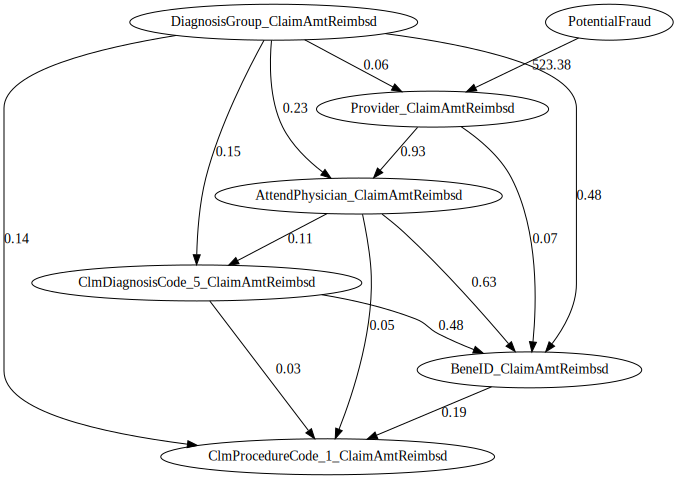

In [43]:
#Causal_Df.columns
labels =['AttendPhysician_ClaimAmtReimbsd','Provider_ClaimAmtReimbsd','DiagnosisGroup_ClaimAmtReimbsd','ClmProcedureCode_1_ClaimAmtReimbsd','ClmDiagnosisCode_5_ClaimAmtReimbsd','BeneID_ClaimAmtReimbsd','PotentialFraud']
make_dot(model.adjacency_matrix_, labels=labels)

In [44]:
#pd.set_option('display.max_columns', 15)
#pd.set_option('display.max_rows', 25)